##                                                           **ASSIGNMENT 12**

### OBJECTIVE:  **To Build Various MLP architecture for MNIST Dataset**

In [0]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.initializers import he_normal


In [0]:
# loading both training and testing Dataset
(X_train , y_train) , (X_test , y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
X_train.shape                

(60000, 28, 28)

In [0]:
print('Number of training points: {}'.format(X_train.shape[0]),' and each image is {} X {} pixel'.format(X_train.shape[1] , X_train.shape[2]))
print('Number of training points: {}'.format(X_test.shape[0]),' and each image is {} X {} pixel'.format(X_test.shape[1] , X_test.shape[2]))

Number of training points: 60000  and each image is 28 X 28 pixel
Number of training points: 10000  and each image is 28 X 28 pixel


In [0]:
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [0]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [0]:

print(type(X_train[0]))


<class 'numpy.ndarray'>


In [0]:
# normalizing
X_train = X_train/255
X_test = X_test/255

In [0]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10)           # one hot encoding 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:

import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

## SOFTMAX CLASSIFIER with 2 hidden layers

In [0]:
# model parameters
output_dim = 10
input_dim = X_train.shape[1]  

batch_size = 128 
nb_epoch = 20

# start building a model
model_2_layers = Sequential()


model_2_layers.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed = None))) #seed ->A Python integer. Used to seed the random generator
model_2_layers.add(BatchNormalization())            # batch normalization
model_2_layers.add(Dropout(0.25))                    #dropout


model_2_layers.add(Dense(52, activation='relu', kernel_initializer=he_normal(seed = None)))
model_2_layers.add(BatchNormalization())
model_2_layers.add(Dropout(0.25))

model_2_layers.add(Dense(output_dim, activation='softmax'))

# model Summary
print("Model Summary :- \n",model_2_layers.summary())

# Compiling the model
model_2_layers.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#training model
history_2_layers = model_2_layers.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 364)               285740    
_________________________________________________________________
batch_normalization_3 (Batch (None, 364)               1456      
_________________________________________________________________
dropout_3 (Dropout)          (None, 364)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 52)                18980     
_________________________________________________________________
batch_normalization_4 (Batch (None, 52)                208       
_________________________________________________________________
dropout_4 (Dropout)          (None, 52)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                530       
Total para

Test score: 0.06521892226291966
Test accuracy: 0.9811


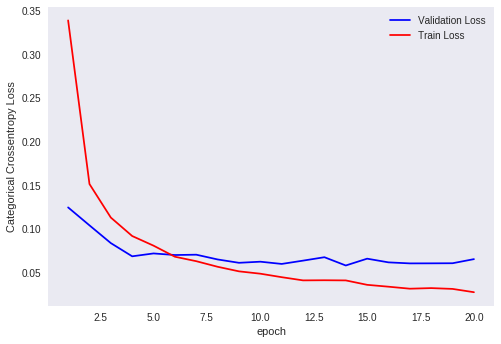

In [0]:
score = model_2_layers.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')


# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history_2_layers.history['val_loss']  # validation loss
ty = history_2_layers.history['loss']      # train loss
plt_dynamic(x, vy, ty,ax)


**3 hidden layers**

In [0]:
# start building a model
model_3_layers = Sequential()


model_3_layers.add(Dense(400, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal()))
model_3_layers.add(BatchNormalization())
model_3_layers.add(Dropout(0.5))                    #dropout

model_3_layers.add(Dense(300, activation='relu', kernel_initializer=he_normal()))
model_3_layers.add(BatchNormalization())
model_3_layers.add(Dropout(0.5))

model_3_layers.add(Dense(100, activation='relu', kernel_initializer=he_normal()))
model_3_layers.add(BatchNormalization())
model_3_layers.add(Dropout(0.5))

model_3_layers.add(Dense(output_dim, activation='softmax'))

# model Summary
print("Model Summary :- \n",model_3_layers.summary())

# Compiling the model
model_3_layers.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#training model
history_3_layers = model_3_layers.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model_3_layers.evaluate(X_test, Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 400)               314000    
_________________________________________________________________
batch_normalization_21 (Batc (None, 400)               1600      
_________________________________________________________________
dropout_28 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 300)               120300    
_________________________________________________________________
batch_normalization_22 (Batc (None, 300)               1200      
_________________________________________________________________
dropout_29 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 100)               30100     
__________

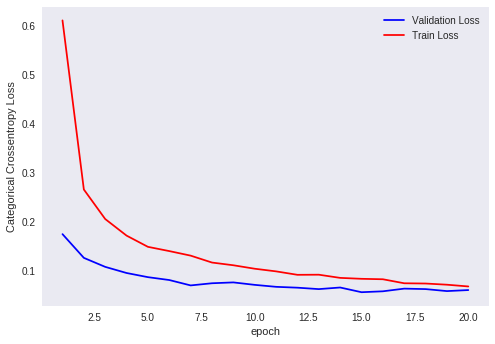

In [0]:

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))


vy = history_3_layers.history['val_loss']  # validation loss
ty = history_3_layers.history['loss']      # train loss
plt_dynamic(x, vy, ty,ax)

**5 Hidden Layers**

In [0]:
from keras.initializers import he_normal 
model_5_layers = Sequential()

model_5_layers.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed = None)))
model_5_layers.add(Dropout(0.25))  

model_5_layers.add(Dense(256 , activation = 'relu' , kernel_initializer = he_normal(seed = None)))
model_5_layers.add(Dropout(0.25))

# batch Normalization
model_5_layers.add(BatchNormalization())

model_5_layers.add(Dense(128 , activation = 'relu' , kernel_initializer = he_normal(seed = None)))
model_5_layers.add(Dropout(0.25))

model_5_layers.add(Dense(64 , activation = 'relu' , kernel_initializer = he_normal(seed = None)))
model_5_layers.add(Dropout(0.25))

model_5_layers.add(BatchNormalization())

model_5_layers.add(Dense(32 , activation = 'relu' , kernel_initializer = he_normal(seed = None)))
model_5_layers.add(Dropout(0.25))

model_5_layers.add(BatchNormalization())

model_5_layers.add(Dense(output_dim, activation='softmax'))

# model Summary
print("Model Summary :- \n",model_5_layers.summary())

# Compiling the model
model_5_layers.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#training model
history_5_layers = model_5_layers.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model_5_layers.evaluate(X_test, Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_41 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_42 (Dropout)         (None, 256)               0         
_________________________________________________________________
batch_normalization_28 (Batc (None, 256)               1024      
_________________________________________________________________
dense_55 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_43 (Dropout)         (None, 128)               0         
__________

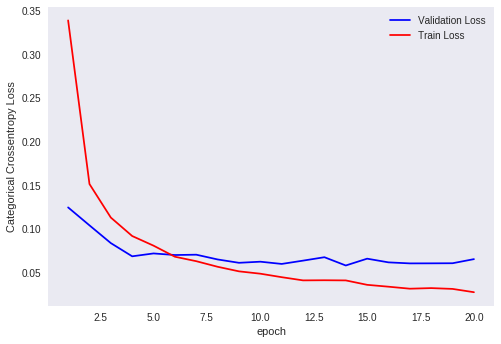

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))


vy = history_2_layers.history['val_loss']  # validation loss
ty = history_2_layers.history['loss']      # train loss
plt_dynamic(x, vy, ty,ax)

OBSERVATION: Deep MLPs are more prone to overfitting hence we can see that validation loss is more compare to train loss as no. of epoch is increasing

In [0]:
from prettytable import PrettyTable

In [0]:
x = PrettyTable()

In [0]:
x.field_names = ["No. of layers", "Test Loss", "Test Accuracy"]
x.add_row(['2' , '0.06521','9811'])
x.add_row(['3' , '0.06082','0.9821'])
x.add_row(['5' , '0.0759','0.9822'])

In [0]:
print(x)

+---------------+-----------+---------------+
| No. of layers | Test Loss | Test Accuracy |
+---------------+-----------+---------------+
|       2       |  0.06521  |      9811     |
|       3       |  0.06082  |     0.9821    |
|       5       |   0.0759  |     0.9822    |
+---------------+-----------+---------------+


**Conclusion**


1.   Increasing number of hidden layers does not always improve the performance of model
2.   Deep MLP are prone to overfitting while shallow MLP are prone to underfitting
3.   Overfitting can be avoid using dropout

